# Country Cluster Identification

## Hierarchical Clustering and PCA

## Problem Statement
Suppuse after the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of a NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Data
The datasets containing those socio-economic factors.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Improting the PCA module
from sklearn.decomposition import PCA

# To perform KMeans clustering
from sklearn.cluster import KMeans

## Data Preparation

### Data Loading

* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services. Given as %age of the Total GDP
* health: Total health spending as %age of Total GDP
* imports: Imports of goods and services. Given as %age of the Total GDP
* Income: Net income per person
* Inflation: The measurement of the annual growth rate of the Prices Index
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [2]:
#
data = pd.DataFrame(pd.read_csv('Country-data.csv'))

data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#checking duplicates

sum(data.duplicated(subset = 'country')) == 0

# No duplicate values

True

### Data Inspection

In [4]:
#
data.shape

(167, 10)

In [5]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


### Data Cleaning

In [7]:
#
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [8]:
# No NULL values are observed.

## Exploratory Data Analytics

### Univariate Analysis

####  We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with  using some socio-economic and health factors that determine the overall development of the country.

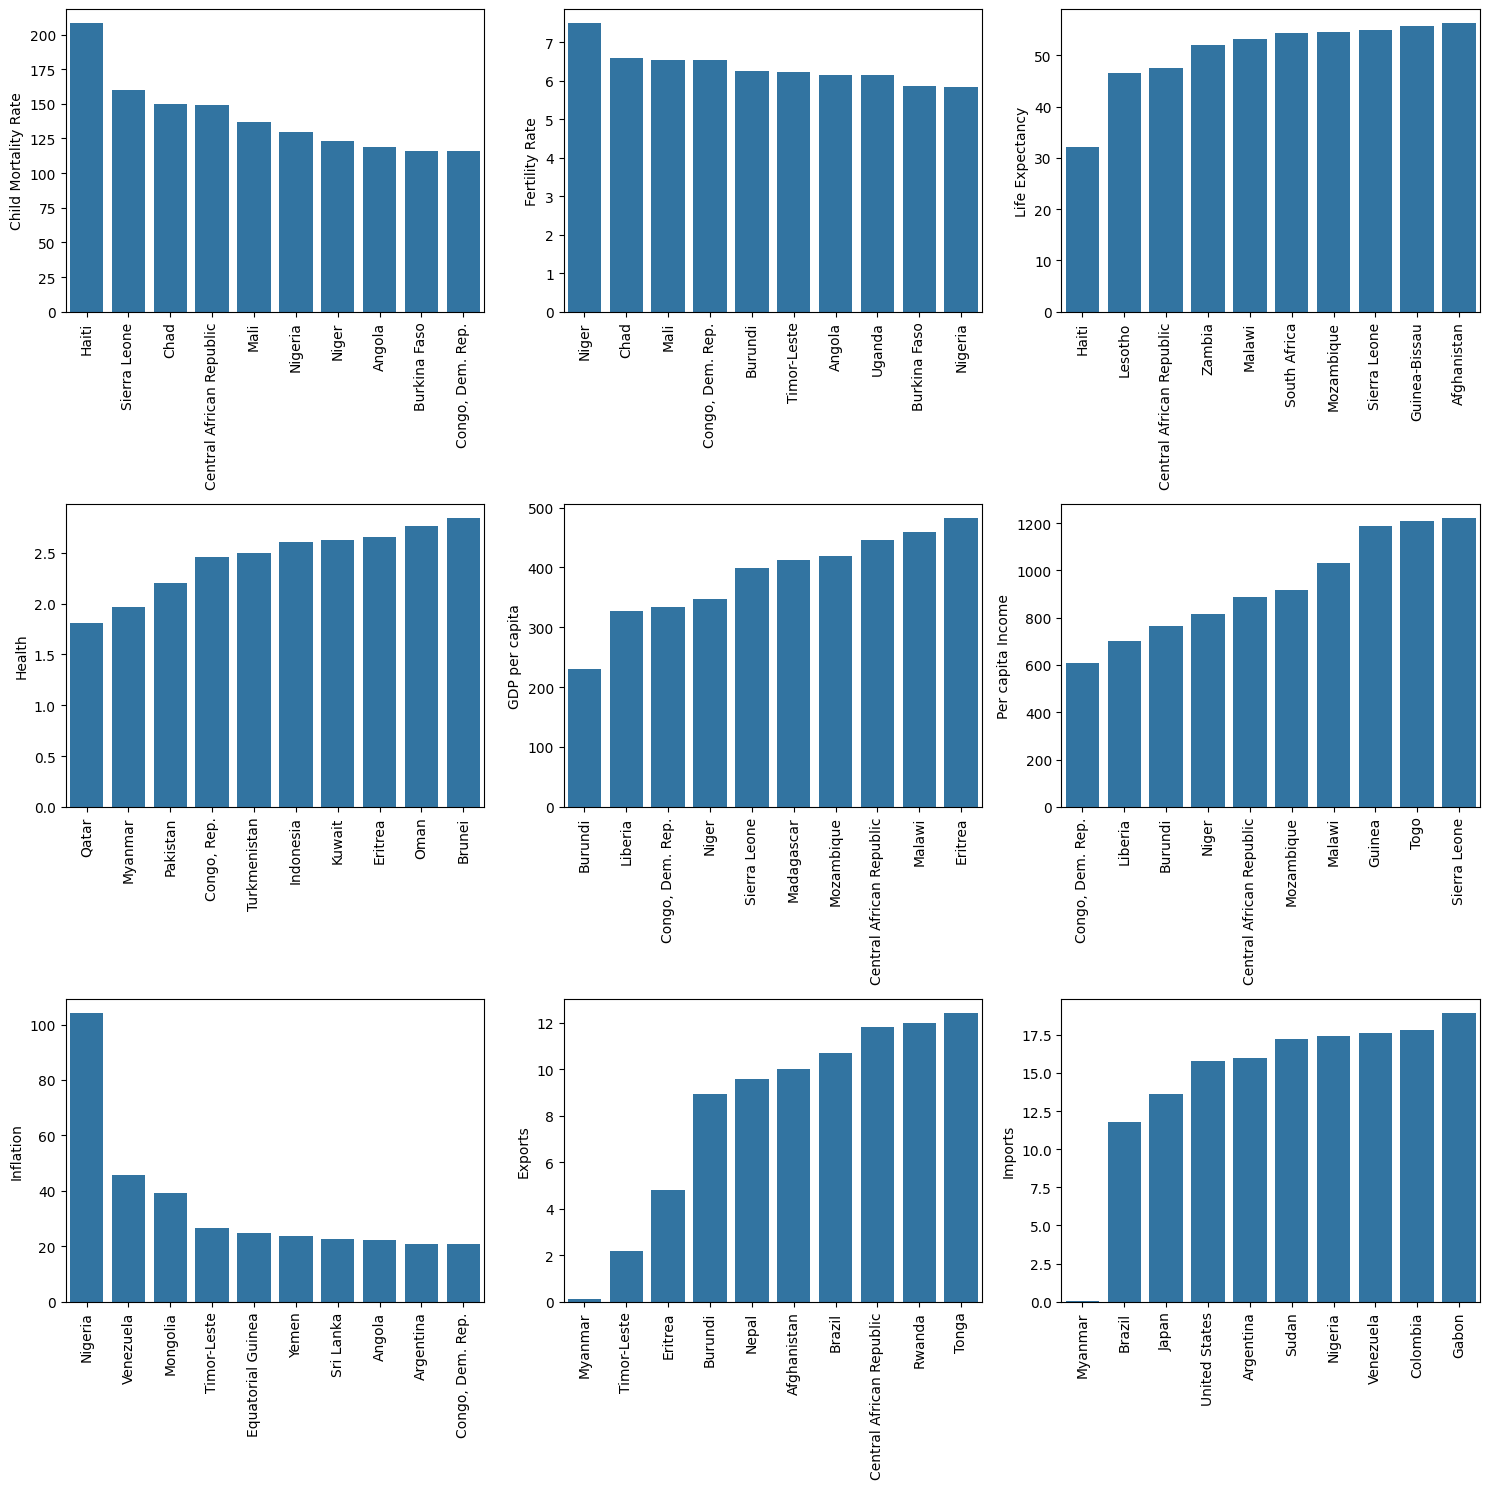

In [9]:
# We will have a look on the lowest 10 countries for each factor.

fig, axs = plt.subplots(3 , 3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same

top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.savefig('eda')
plt.show()



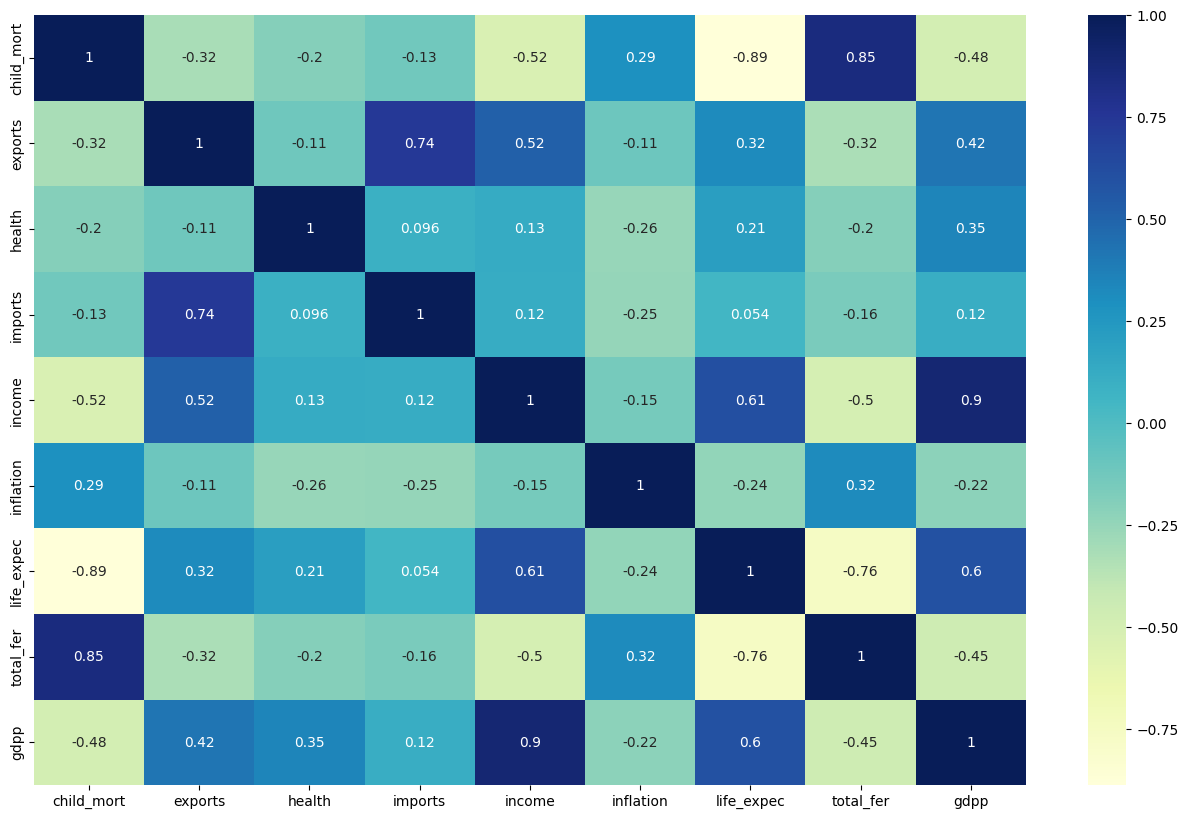

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.drop('country', axis=1).corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [11]:
# We can see there is high correlation between some variables, we will use PCA to solve this issue.

## Outlier Analysis

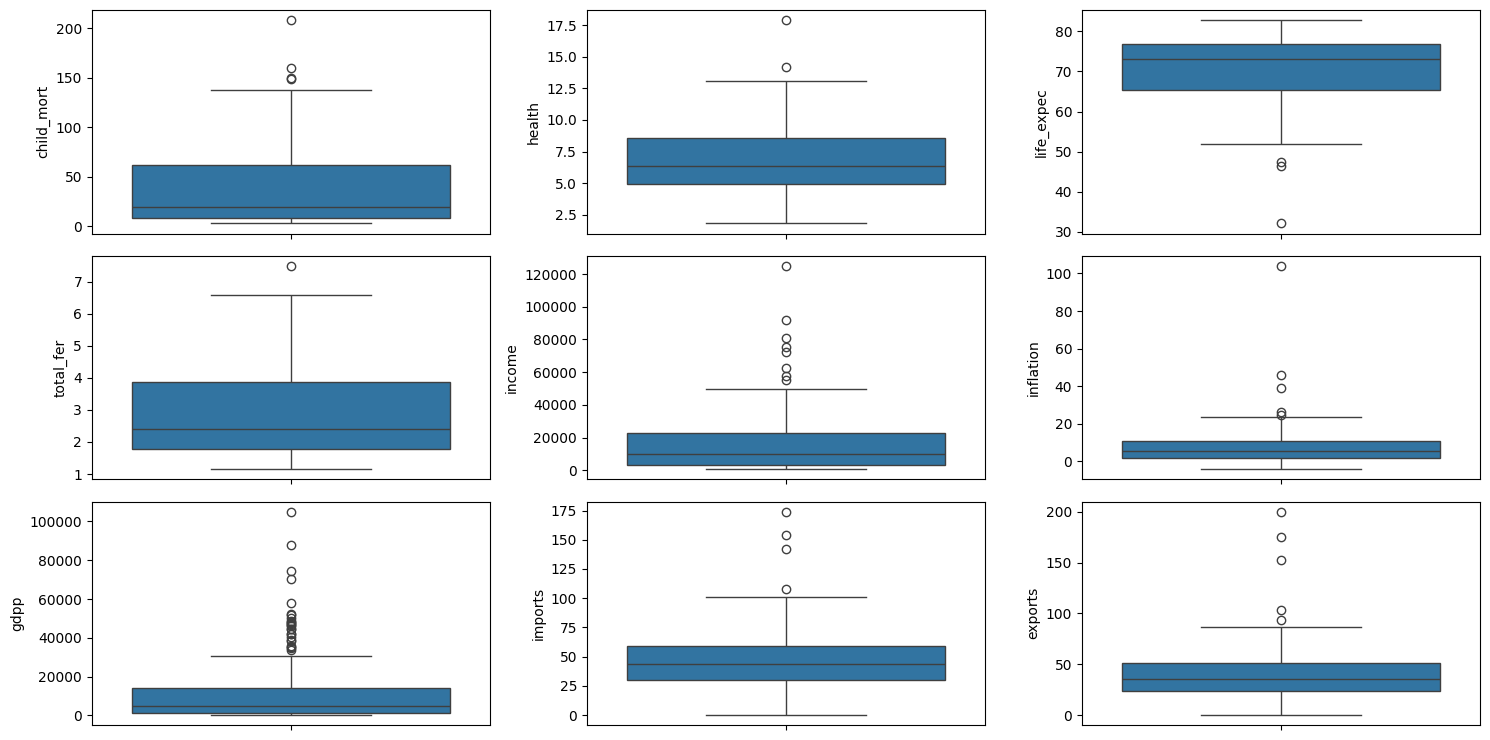

In [12]:
# We will see how values in each columns are distributed using boxplot

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])

plt.tight_layout()

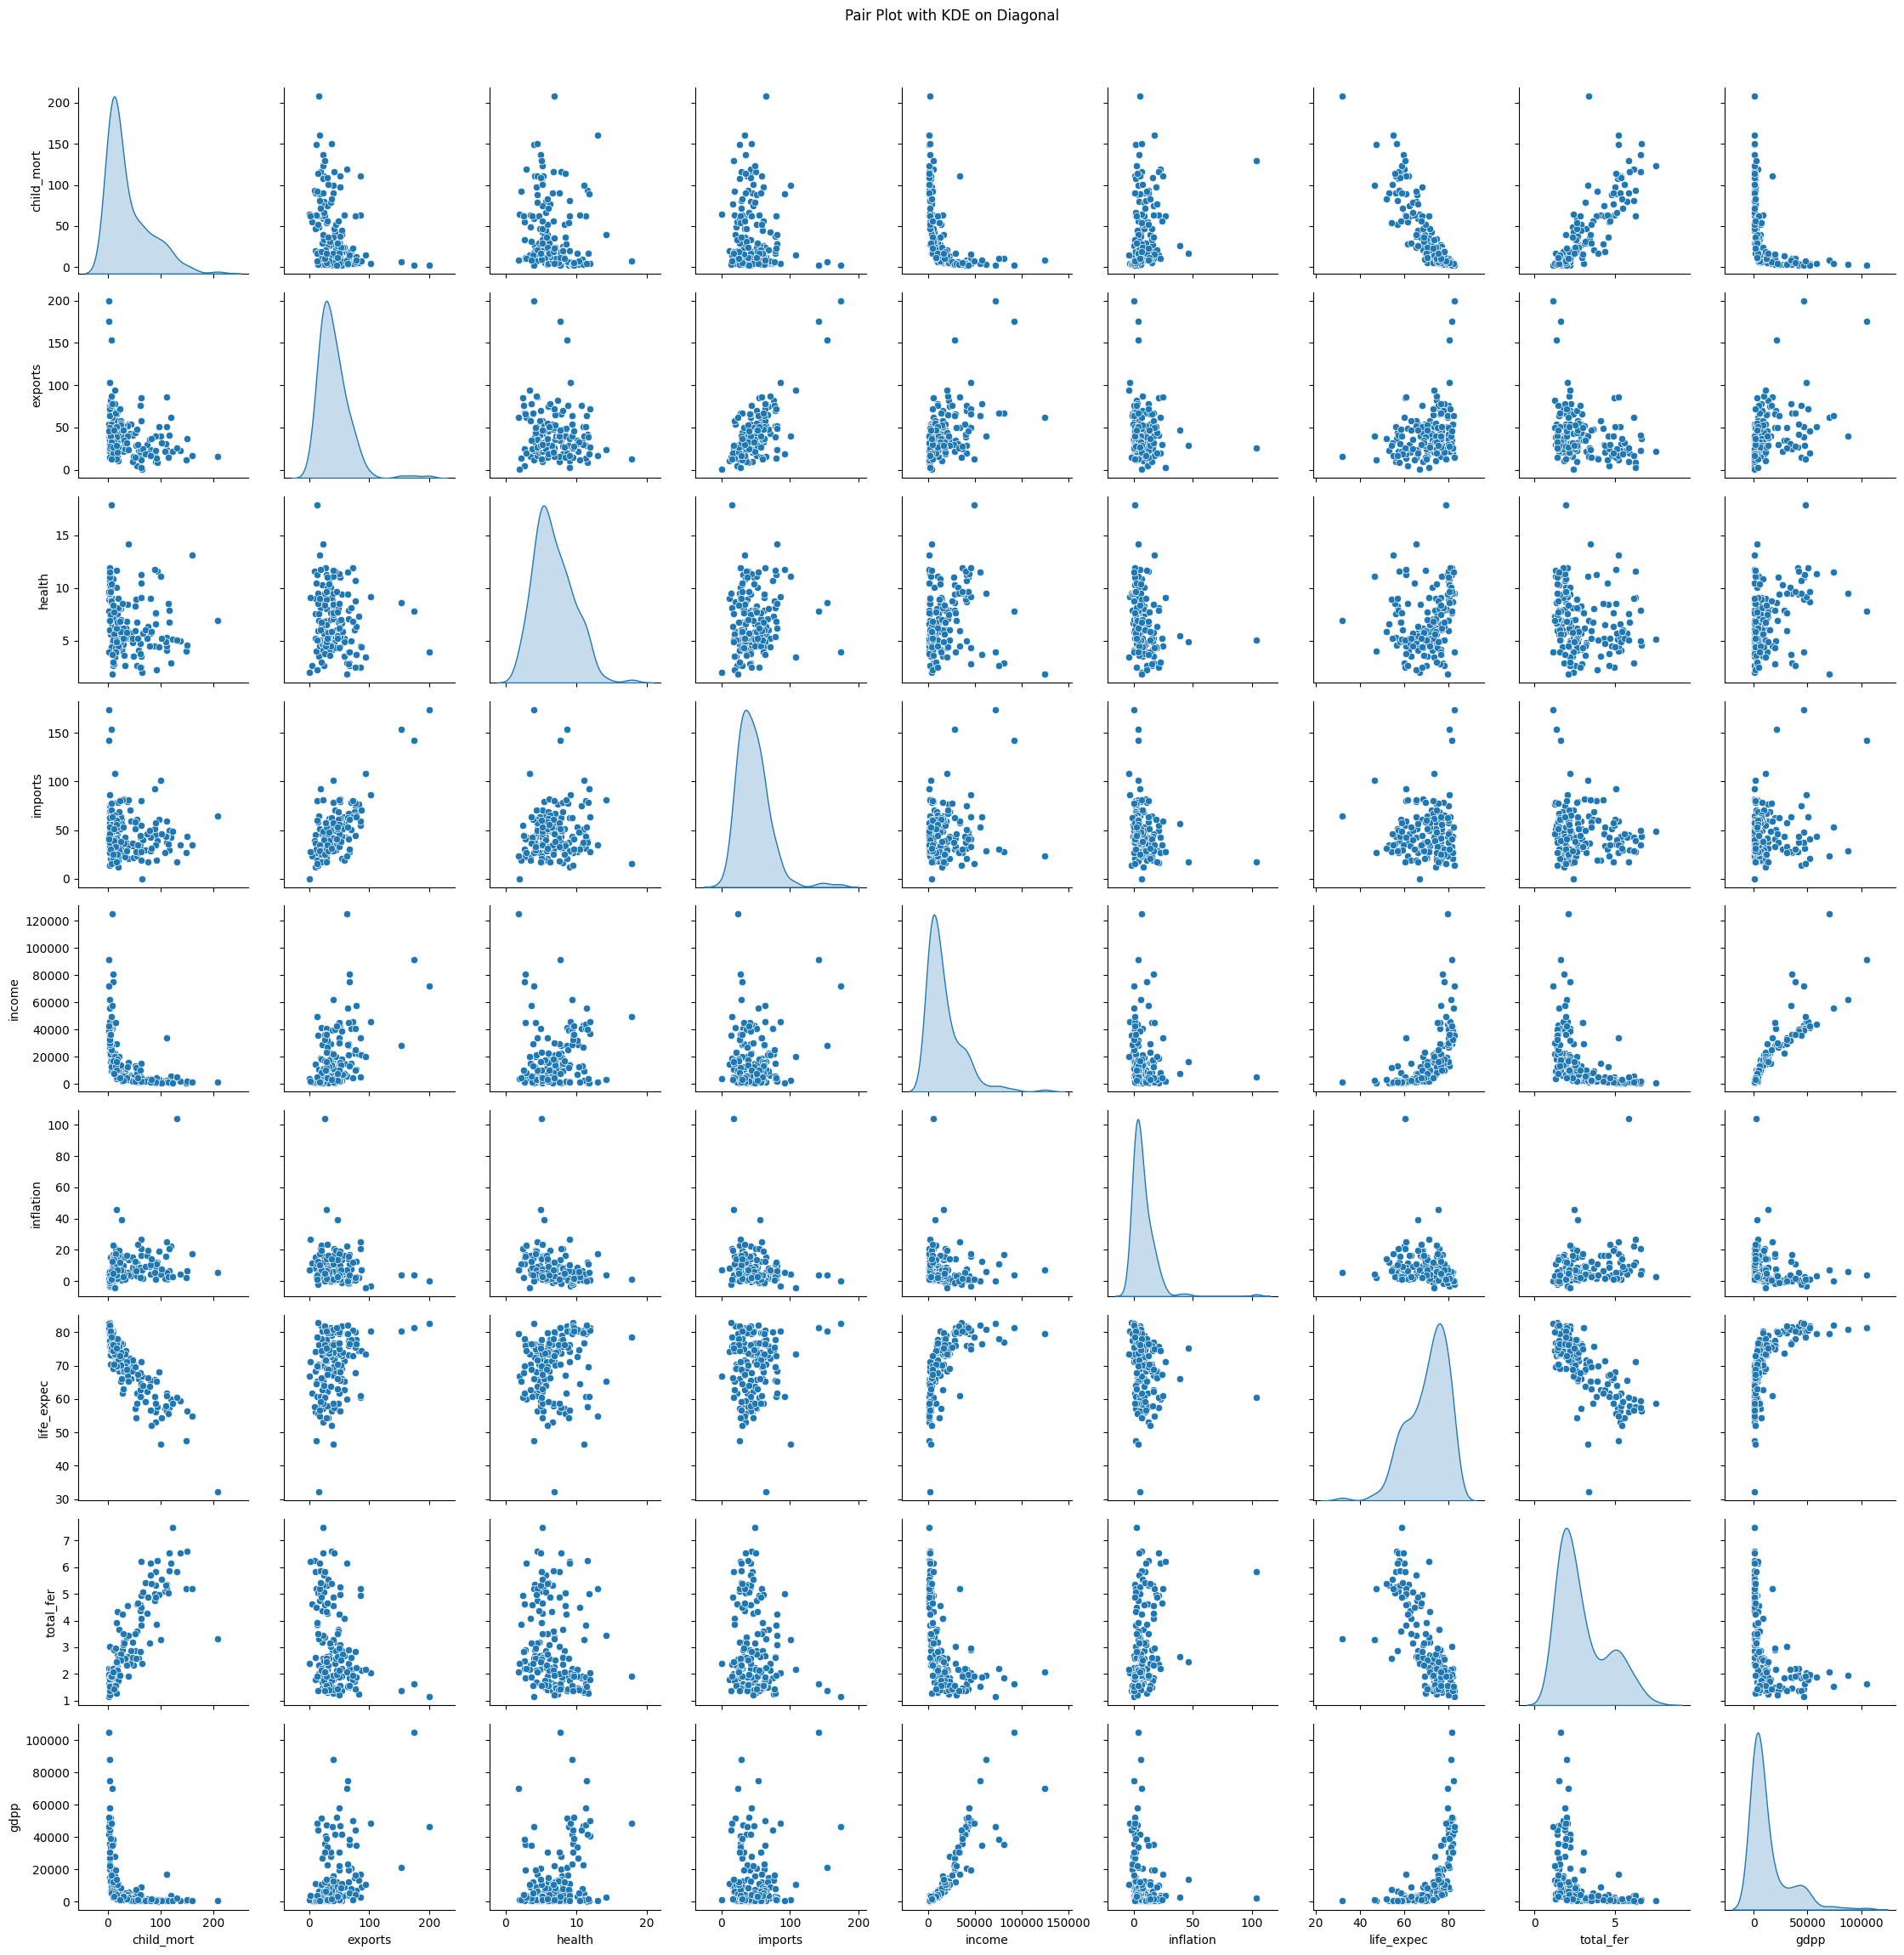

In [13]:
# Generate a pairplot with KDE on the diagonal and scatter plots for other pairs
sns.pairplot(data.drop('country', axis=1), diag_kind='kde')
plt.suptitle('Pair Plot with KDE on Diagonal', y=1.02) # Add a title
plt.tight_layout()
plt.show()

In [14]:
# Before manipulating data, we will save one copy of orignal data.
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]

In [16]:
#
data_help.shape

(167, 10)

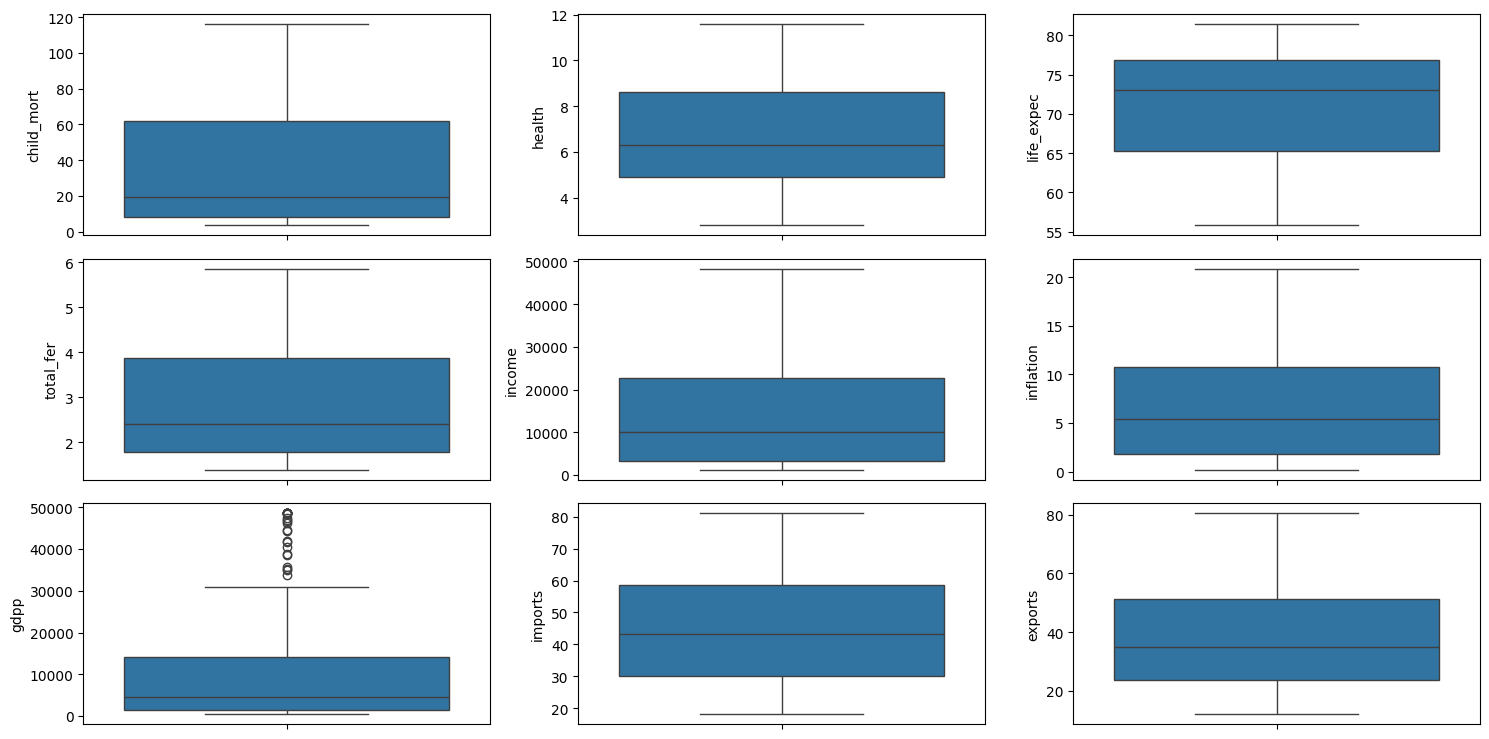

In [17]:
#
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

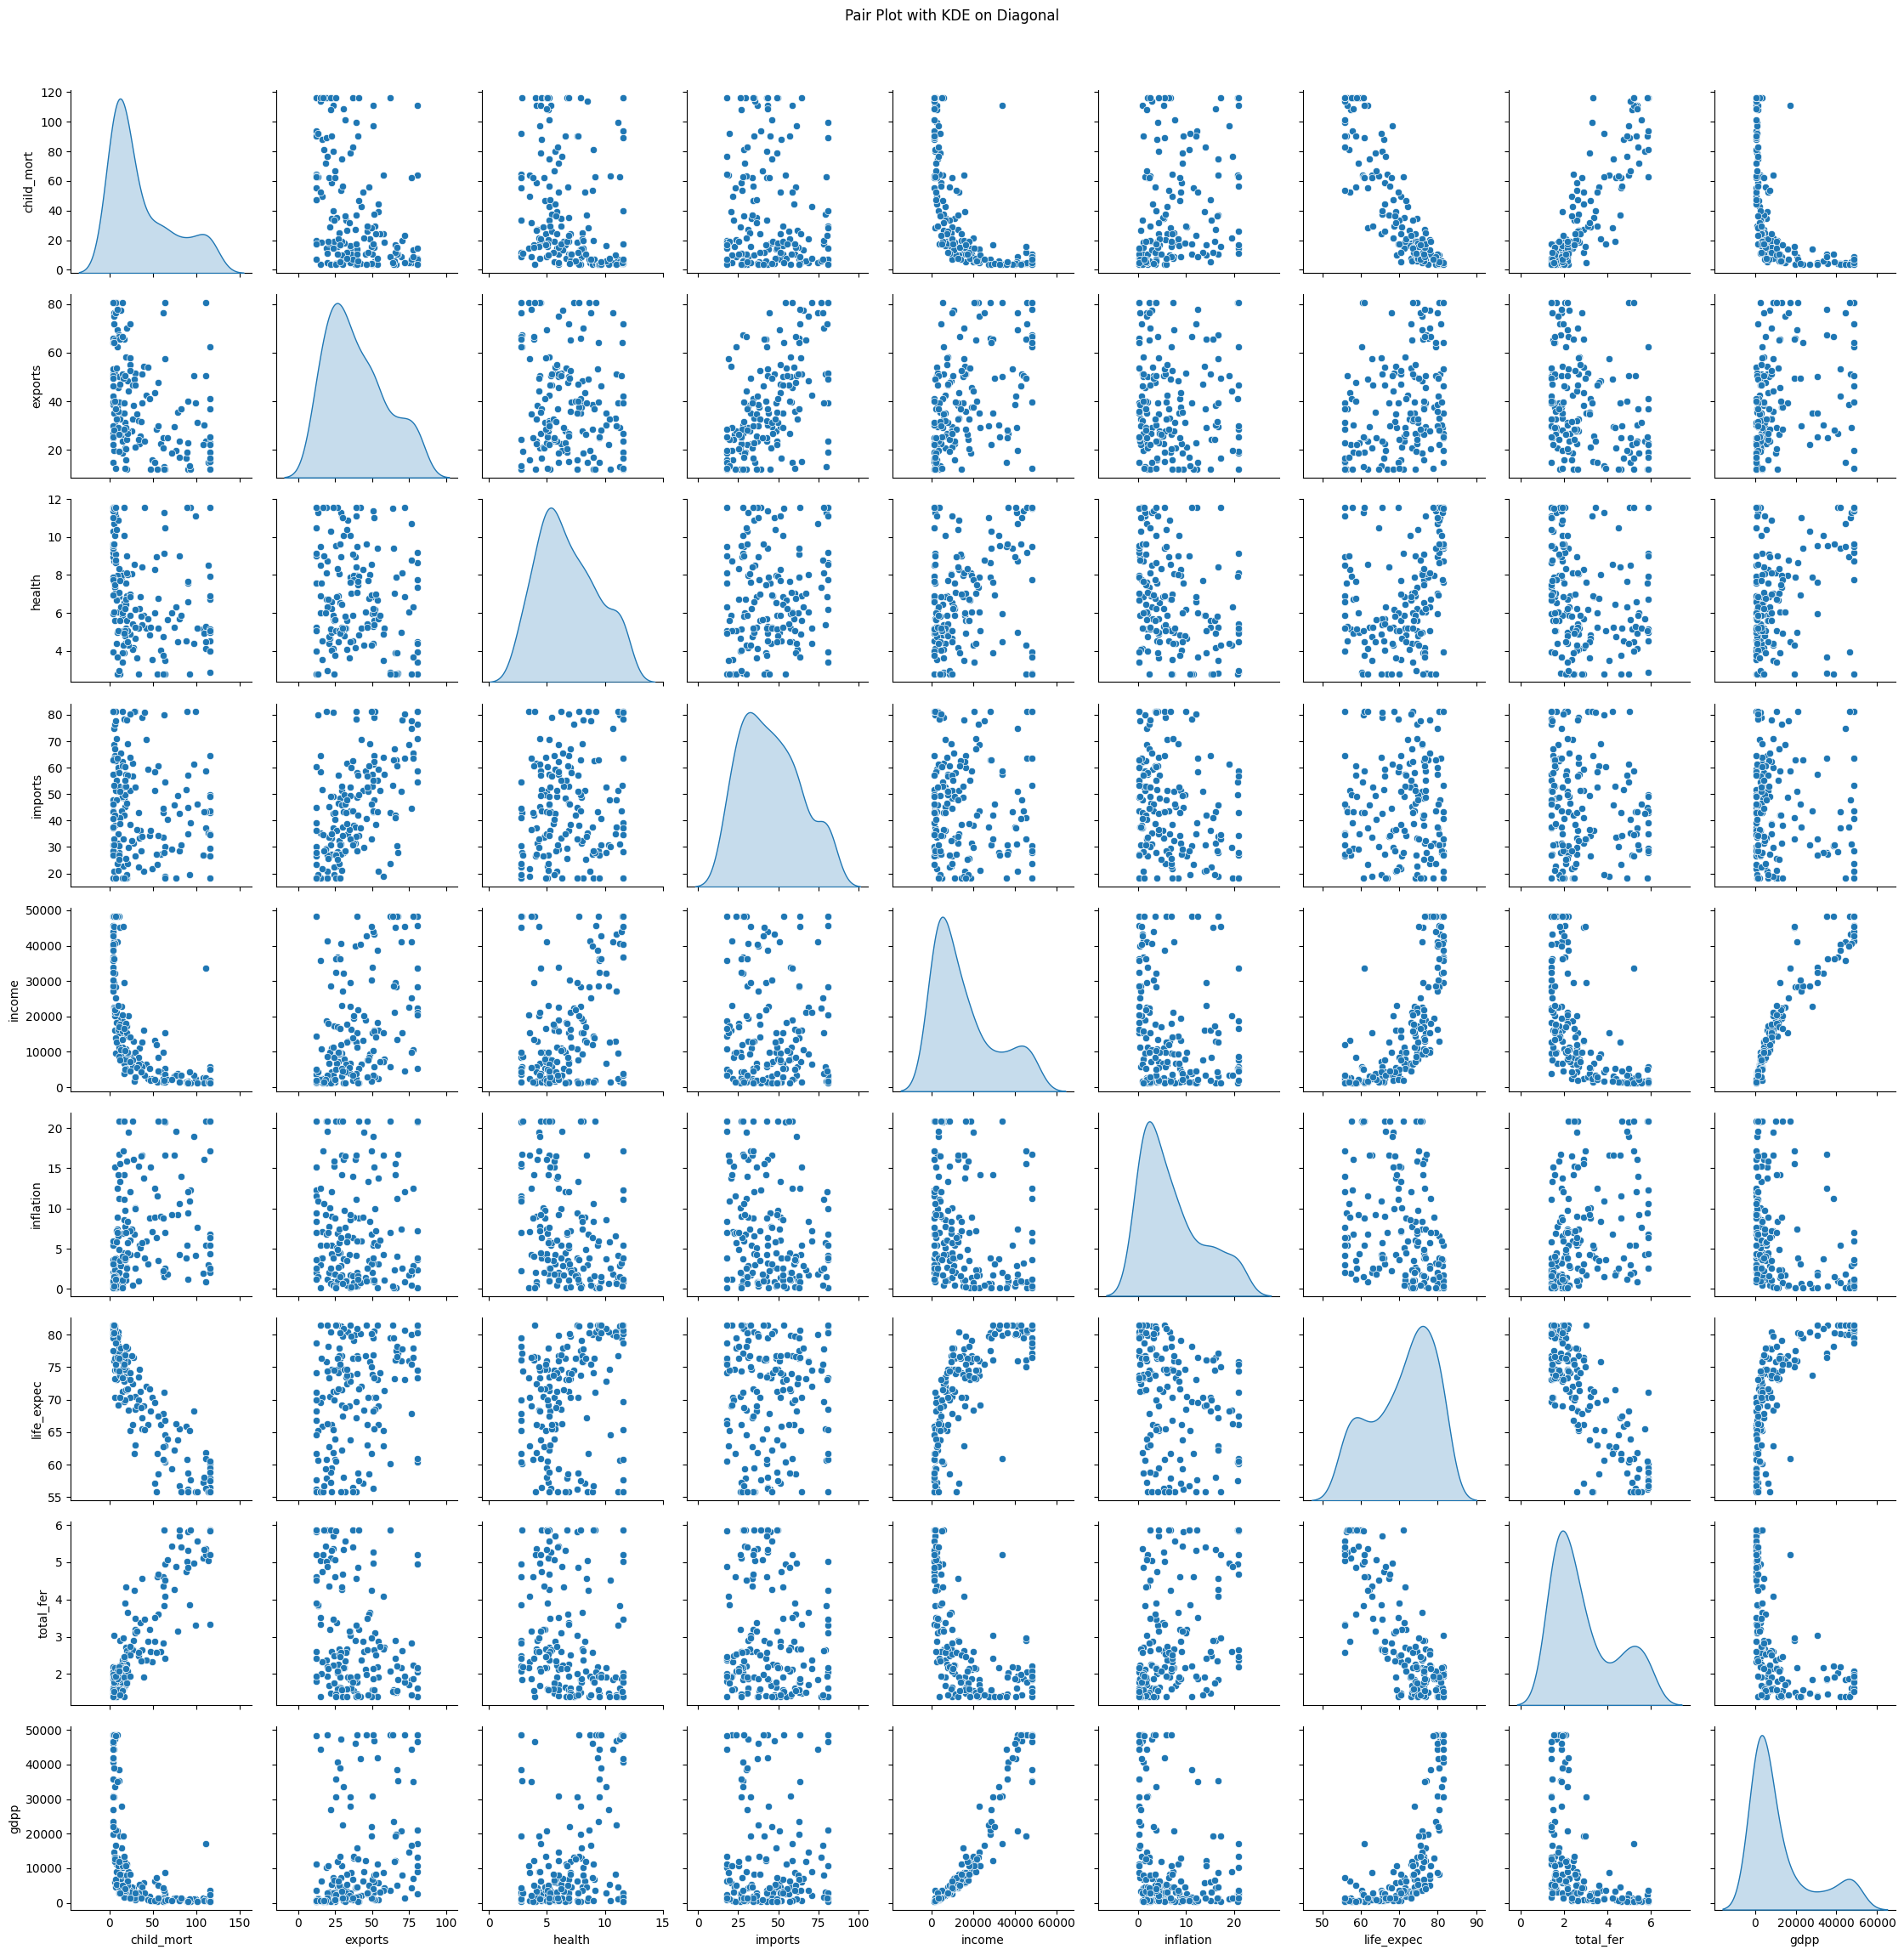

In [18]:
# Generate a pairplot with KDE on the diagonal and scatter plots for other pairs
sns.pairplot(data_help.drop('country', axis=1), diag_kind='kde')
plt.suptitle('Pair Plot with KDE on Diagonal', y=1.02) # Add a title
plt.tight_layout()
plt.show()

### Scaling the data

In [19]:
# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

## PCA on the Data

In [20]:
#
pca = PCA(svd_solver='randomized', random_state=42)

In [21]:
# Putting feature variable to X
X = data_help.drop(['country'],axis=1)

# Putting response variable to y (countries as labels)
y = data_help['country']

In [22]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

#### Let's plot the principal components and try to make sense of them.
#### We'll plot original features on the first 2 principal components as axes

In [23]:
#
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [ 0.032585  ,  0.59983764, -0.19168628,  0.72998099, -0.11098633,
        -0.07988177, -0.12988256,  0.00878147, -0.18404209],
       [ 0.0942617 , -0.2952823 ,  0.6464977 ,  0.28358913, -0.19801532,
        -0.59047762, -0.11300352,  0.06006172, -0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [-0.13002118,  0.35338869,  0.1492239 , -0.24961913, -0.21838481,
        -0.11649633,  0.56635232,  0.59092125, -0.20597879],
       [ 0.77090607,  0.02573741,  0.02487332,  0.03452382, -0

In [24]:
#
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df#.head()

,PC1,PC2,Feature
0,-0.421623,0.032585,child_mort
1,0.232156,0.599838,exports
2,0.181381,-0.191686,health
3,0.094524,0.729981,imports
4,0.410887,-0.110986,income
5,-0.225176,-0.079882,inflation
6,0.431881,-0.129883,life_expec
7,-0.406693,0.008781,total_fer
8,0.393765,-0.184042,gdpp


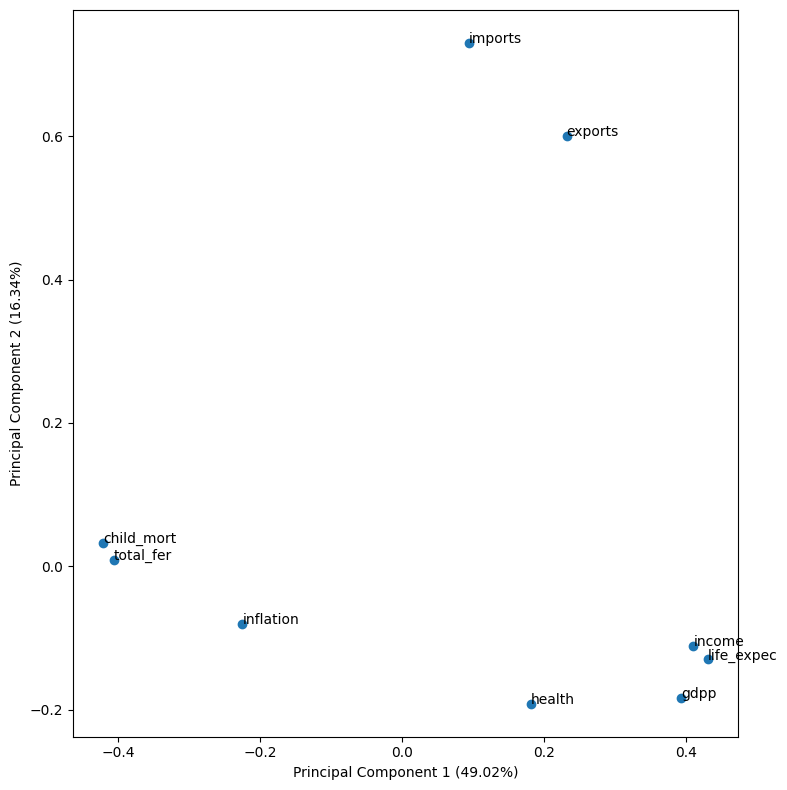

In [25]:
#
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components


In [26]:
#
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

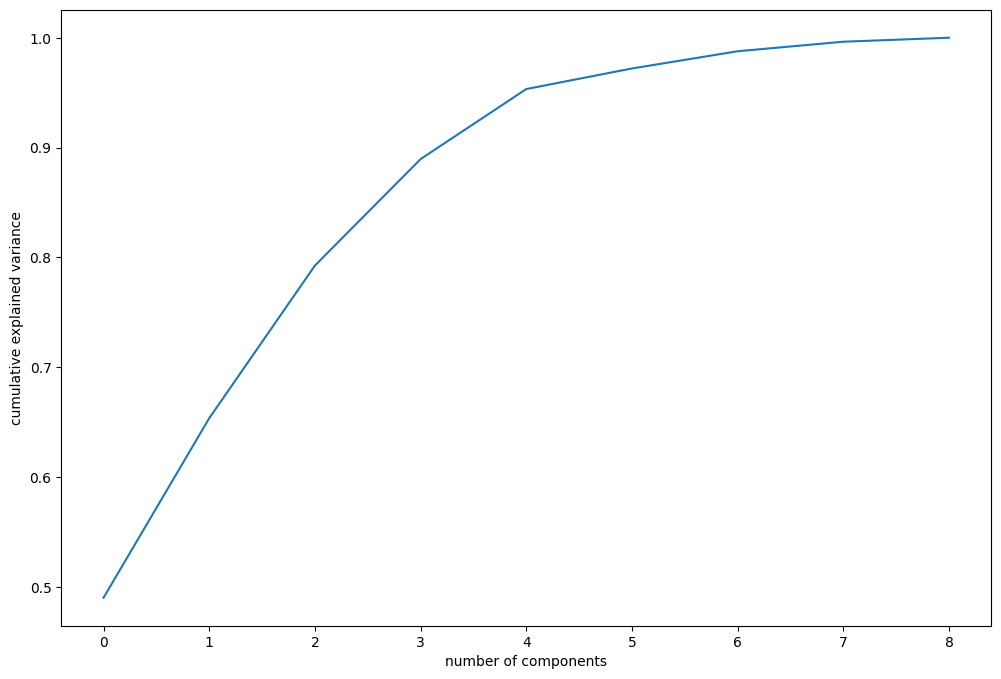

In [27]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

## Hierarchical clustering

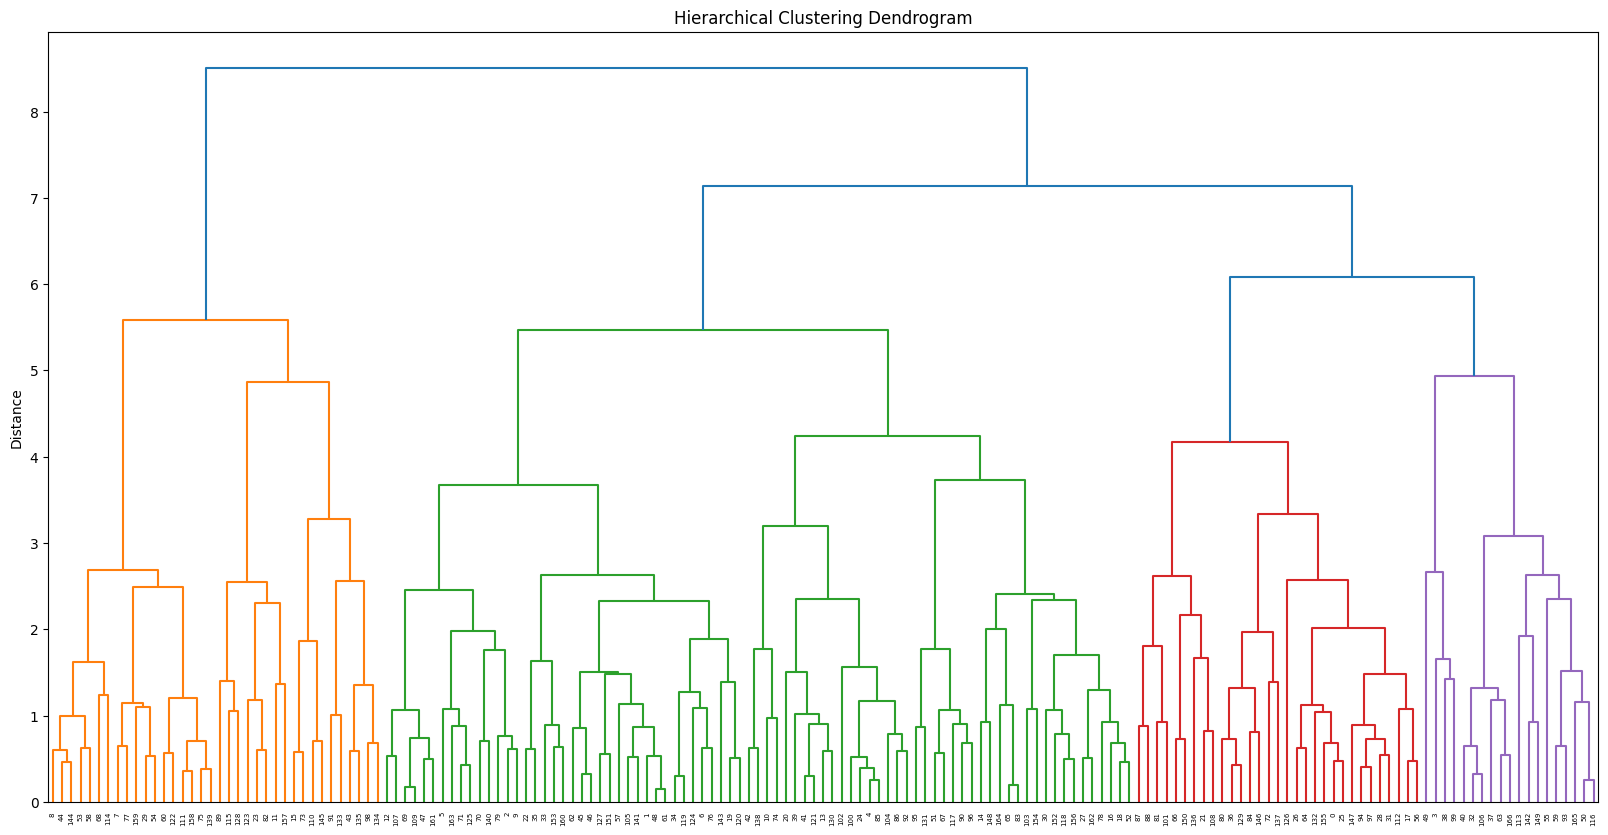

In [28]:
#
df_pca = pd.DataFrame(pca.transform(X)[:, :4])

mergings = linkage(df_pca, method = "complete", metric='euclidean')
plt.figure(figsize=(20, 10)) # Increased figure size for a larger dendrogram
dendrogram(mergings)
plt.ylabel('Distance') # Labeling the y-axis as 'Distance'
plt.title('Hierarchical Clustering Dendrogram') # Adding a title for clarity
plt.show()

In [29]:
# Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

In [30]:
#
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()


,PC1,PC2,PC3,PC4,ClusterID
0,-3.276710,-0.384825,1.061693,0.915760,0
1,0.482592,-0.138345,0.315498,-1.429981,1
2,-0.447438,-0.492021,-1.777013,-0.669628,1
3,-3.356983,1.158613,-2.059427,1.732923,2
4,1.244934,0.702870,0.223665,-0.743702,1


In [31]:
#
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.276710,-0.384825,1.061693,0.915760,0
1,Albania,0.482592,-0.138345,0.315498,-1.429981,1
2,Algeria,-0.447438,-0.492021,-1.777013,-0.669628,1
3,Angola,-3.356983,1.158613,-2.059427,1.732923,2
4,Antigua and Barbuda,1.244934,0.702870,0.223665,-0.743702,1


In [32]:
#
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
#
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [34]:
#
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,88.864516,23.836129,7.676774,48.009677,3012.774194,6.213710,58.574194,4.760000,1450.870968
1,1,20.860494,40.080111,6.194321,46.756369,12346.172840,7.102543,73.256790,2.222593,7071.283951
2,2,91.310526,37.836316,4.790000,37.984211,5217.210526,20.811053,61.194737,5.212105,2645.421053
3,3,4.250000,32.577778,10.605000,31.594444,39372.222222,1.617111,80.877778,1.744444,44222.222222
4,4,7.511111,87.472222,6.477778,70.261111,53438.888889,5.950944,78.594444,1.905000,38944.444444


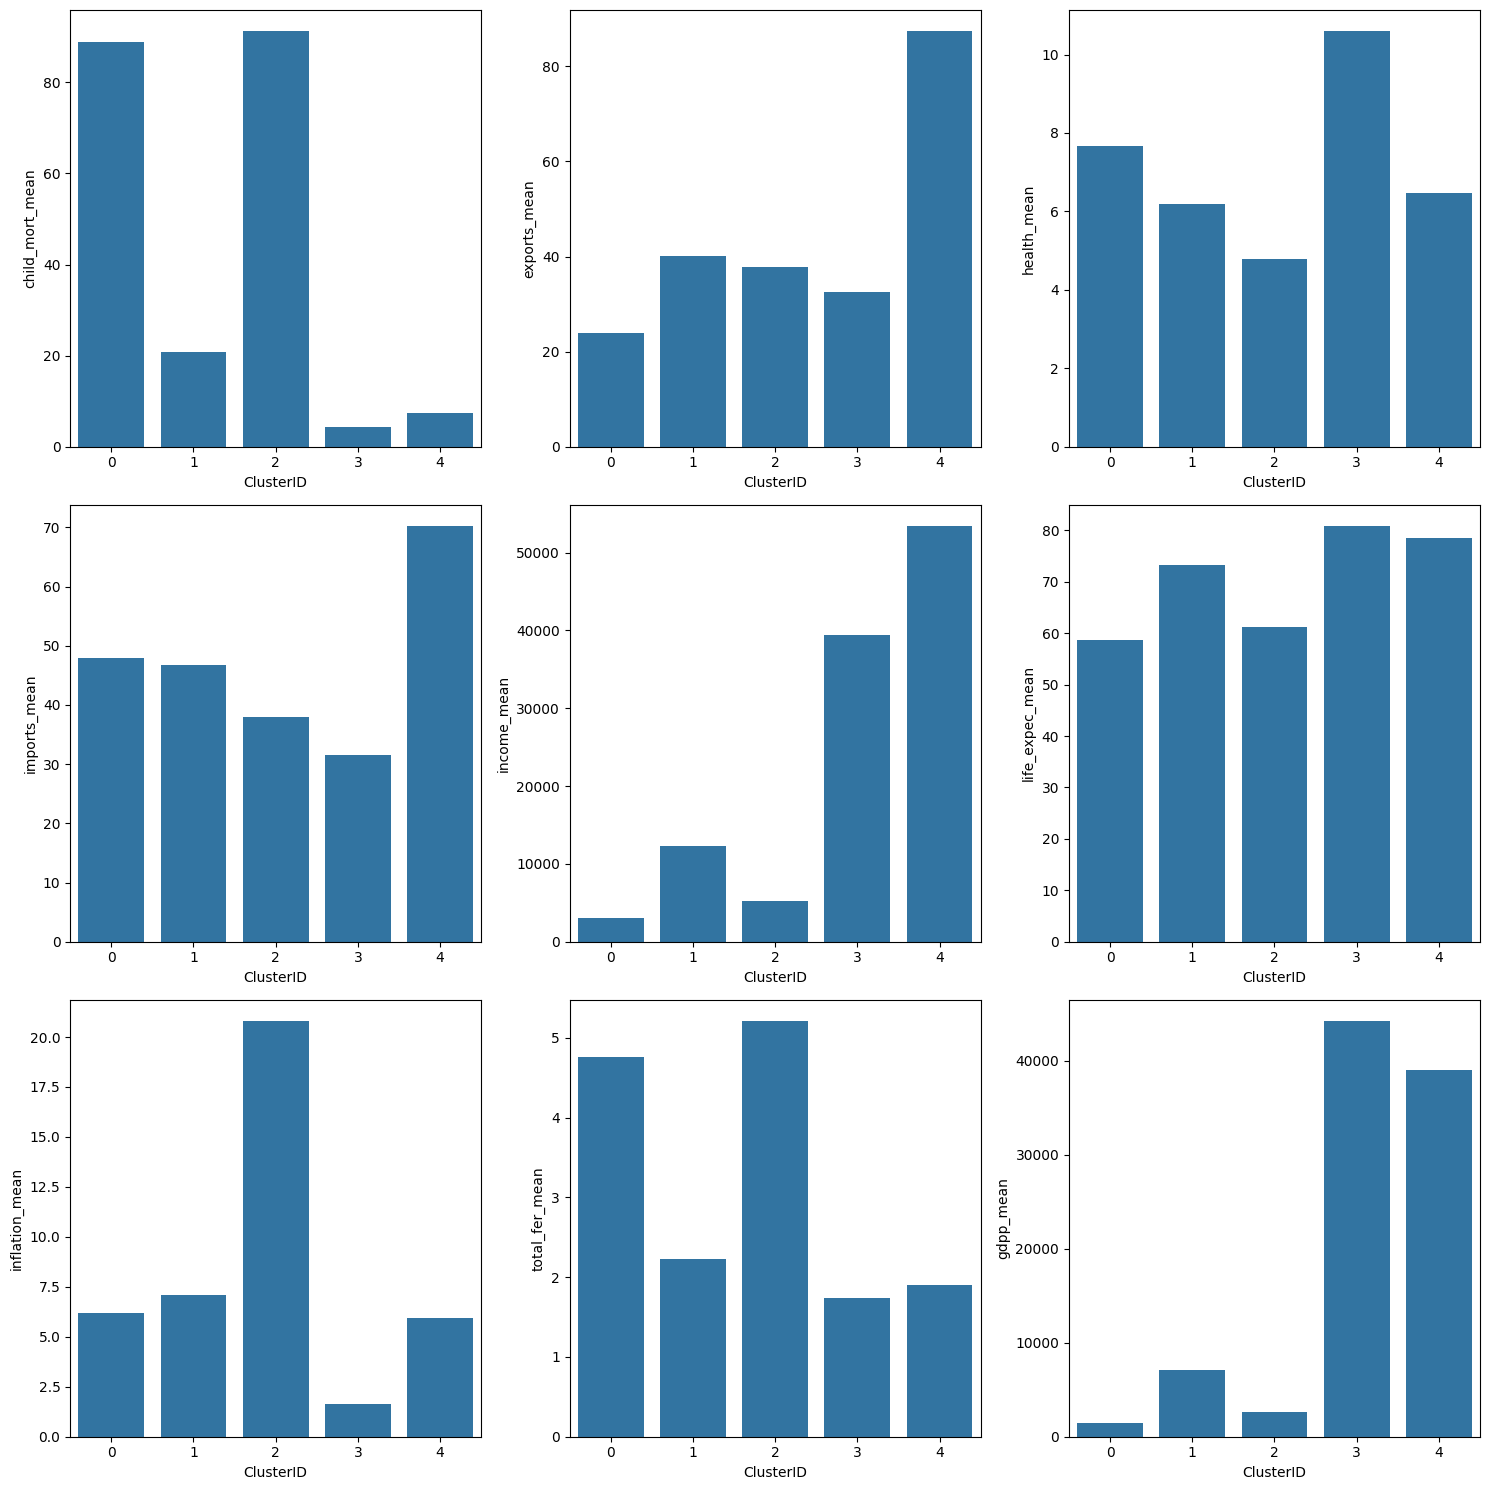

In [35]:
#
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [36]:
#
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Comoros', 'Gambia',
       'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Micronesia, Fed. Sts.',
       'Namibia', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Tajikistan', 'Tanzania',
       'Togo', 'Uganda'], dtype=object)

### Recommendations
Cluster with ClusterID as 0, is the cluster of most backward country.
